<a href="https://colab.research.google.com/github/dangkhoa152/3122410187_TranLeDangKhoa_DataAnalysis/blob/main/Chapter9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 9

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [2]:
import matplotlib.pyplot as plt

## A Brief matplotlib API Primer

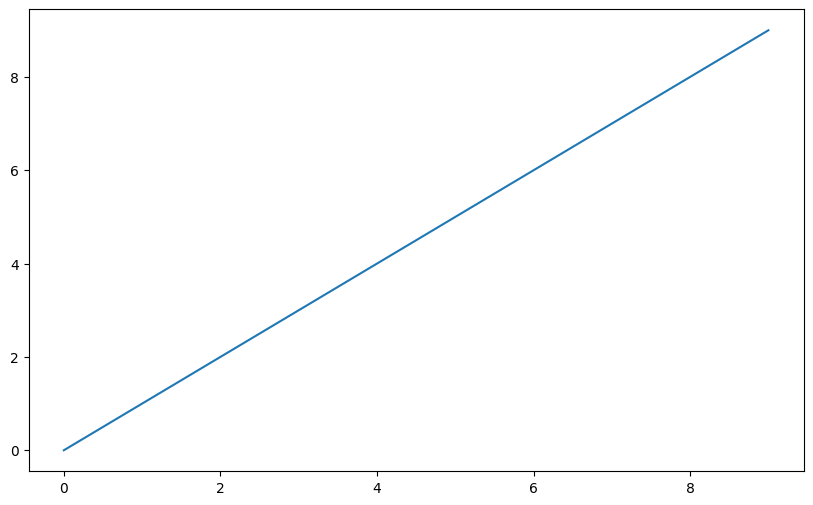

In [3]:
data = np.arange(10)
data
plt.plot(data)

## Figures and Subplots

In [4]:
fig = plt.figure()

<Figure size 1000x600 with 0 Axes>

In [5]:
ax1 = fig.add_subplot(2, 2, 1)

In [6]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [7]:
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
         linestyle="dashed")

In [8]:
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));

In [9]:
plt.close("all")

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

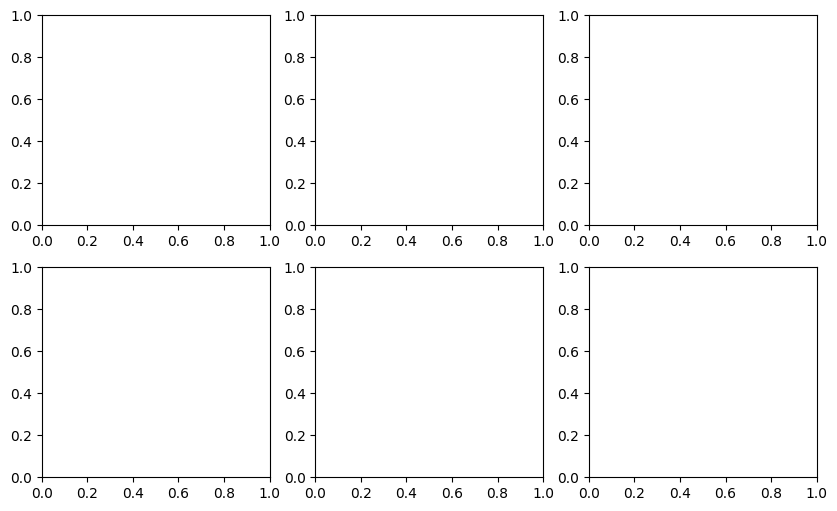

In [10]:
fig, axes = plt.subplots(2, 3)
axes

## Adjusting the spacing around subplots

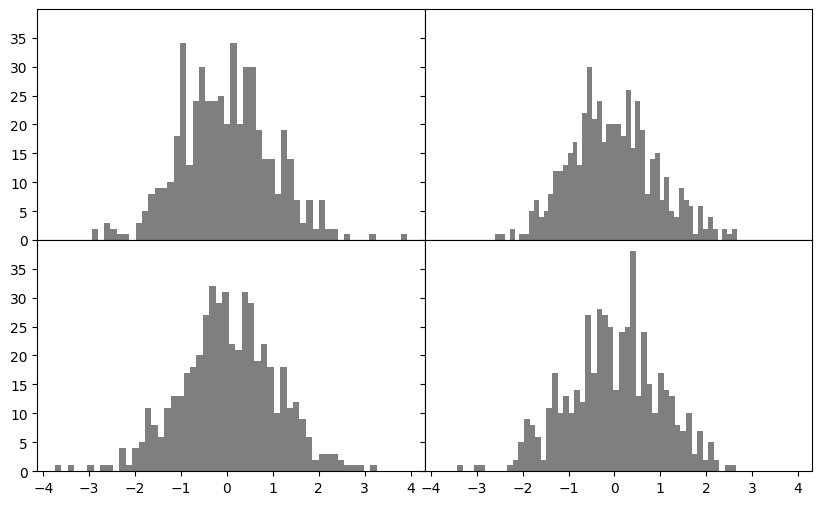

In [11]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

In [12]:
fig = plt.figure()

<Figure size 1000x600 with 0 Axes>

## Colors, Markers, and Line Styles

In [13]:
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black",
        linestyle="dashed", marker="o");

In [14]:
plt.close("all")

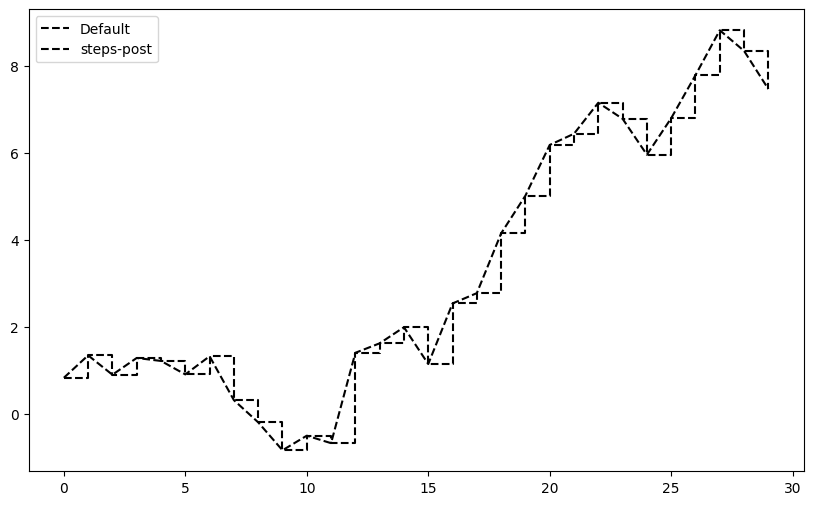

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed",
        drawstyle="steps-post", label="steps-post");
ax.legend()

## Ticks, Labels, and Legends

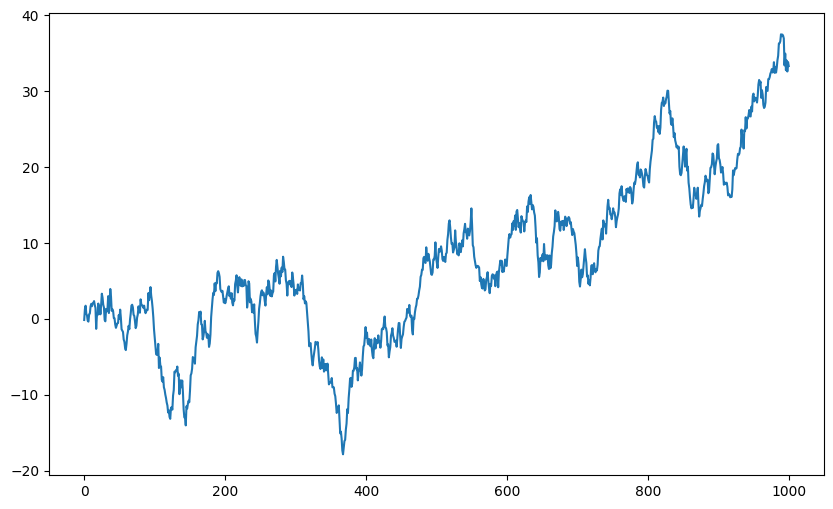

In [16]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());

In [17]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize=8)

In [18]:
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")

Text(0.5, 1.0, 'My first matplotlib plot')

## Adding legends

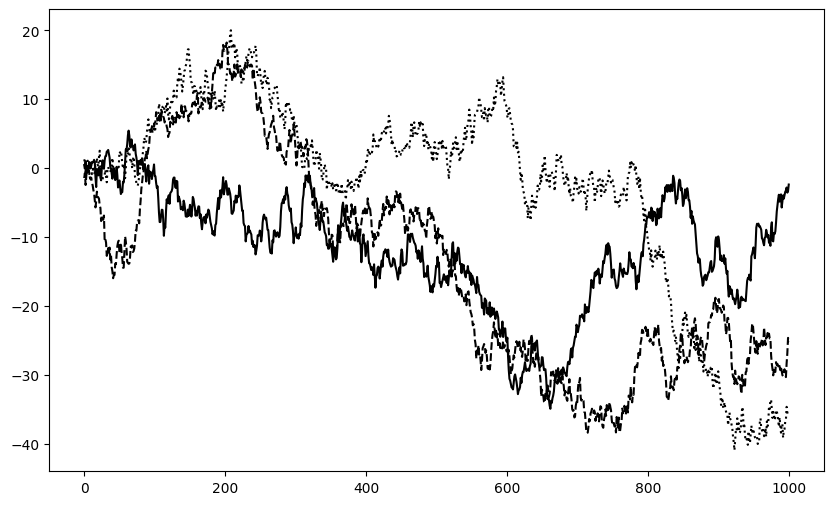

In [19]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed",
        label="two");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted",
        label="three");

In [20]:
ax.legend()

## Annotations and Drawing on a Subplot

/tmp/ipython-input-1219363393.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spx = yf.download("^GSPC", start="2005-01-01", end="2011-12-31")["Close"]
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/usr/local/lib/python3.12/dist-packages/matplotlib/text.py:906: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/usr/local/lib/python3.12/dist-packages/matplotlib/text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))


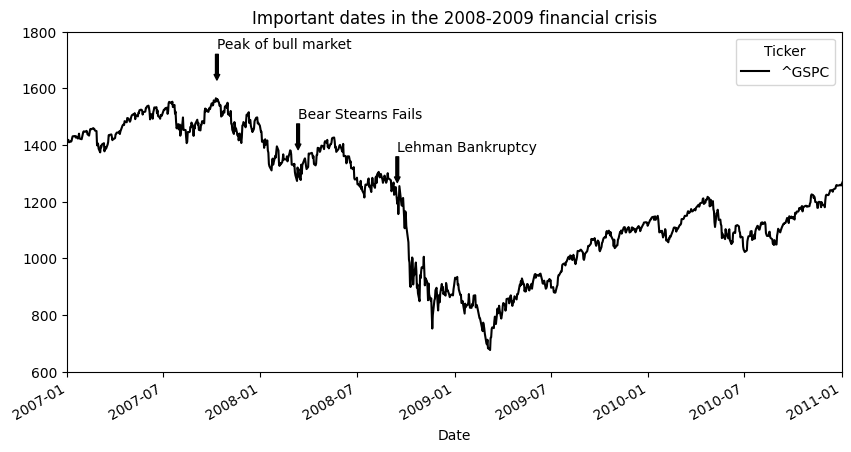

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

# Tải dữ liệu S&P 500 (Close price)
spx = yf.download("^GSPC", start="2005-01-01", end="2011-12-31")["Close"]
spx.name = "SPX"

# Hàm thay thế cho .asof() (tìm giá trị gần nhất trước/đúng ngày)
def asof_value(s: pd.Series, dt: datetime):
    s2 = s.loc[:pd.Timestamp(dt)]
    return s2.iloc[-1] if len(s2) else None

fig, ax = plt.subplots(figsize=(10, 5))

# Vẽ đường giá
spx.plot(ax=ax, color="black")

# Các mốc khủng hoảng
crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12),  "Bear Stearns Fails"),
    (datetime(2008, 9, 15),  "Lehman Bankruptcy"),
]

# Annotate sự kiện
for date, label in crisis_data:
    y = asof_value(spx, date)
    if y is None:
        continue
    ax.annotate(
        label,
        xy=(date, y + 75),
        xytext=(date, y + 225),
        arrowprops=dict(facecolor="black", headwidth=4, width=2, headlength=4),
        ha="left", va="top"
    )

# Zoom vào 2007-2010
ax.set_xlim([pd.Timestamp("2007-01-01"), pd.Timestamp("2011-01-01")])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")

plt.show()



In [24]:
ax.set_title("Important dates in the 2008–2009 financial crisis")

Text(0.5, 1.0, 'Important dates in the 2008–2009 financial crisis')

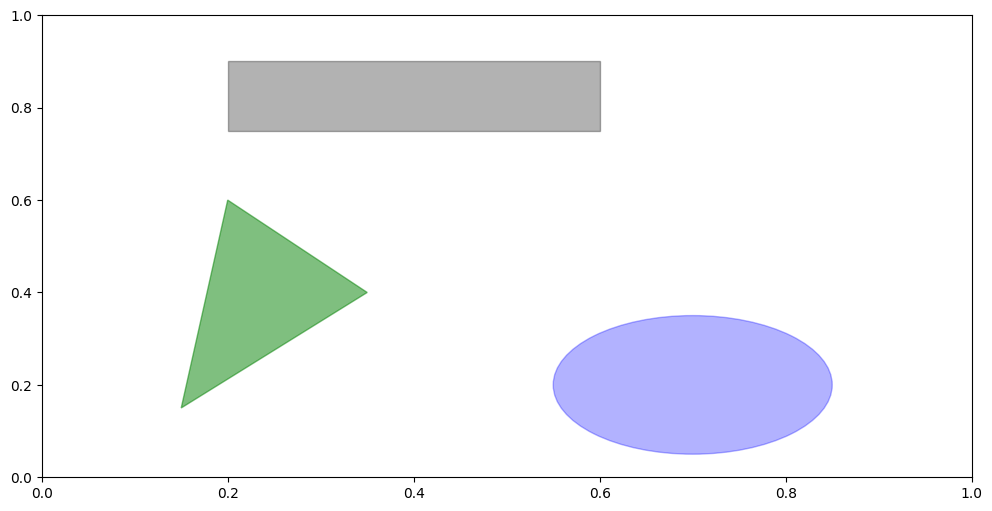

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [29]:
plt.close("all")

## Line Plots

<Axes: >

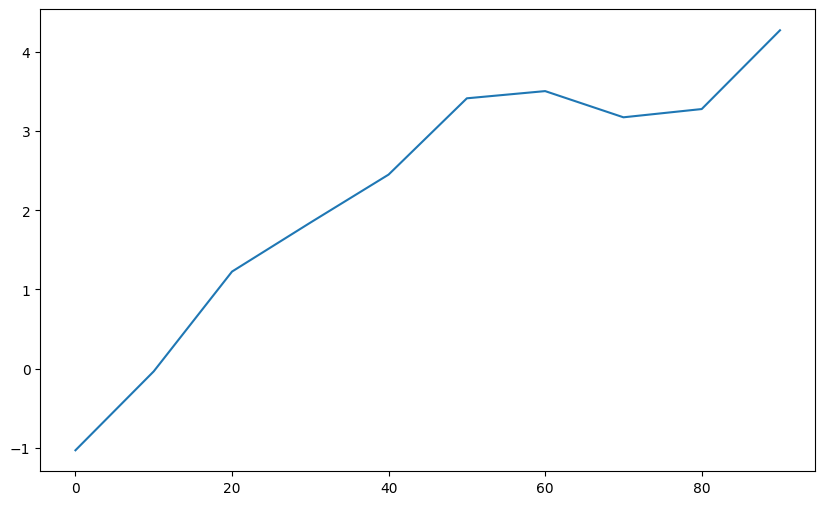

In [30]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<Axes: >

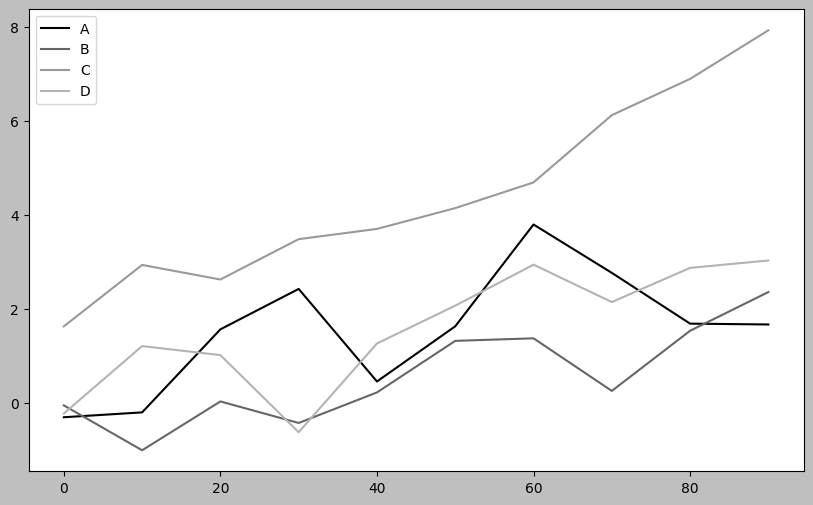

In [31]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('grayscale')
df.plot()

## Bar Plots

<Axes: >

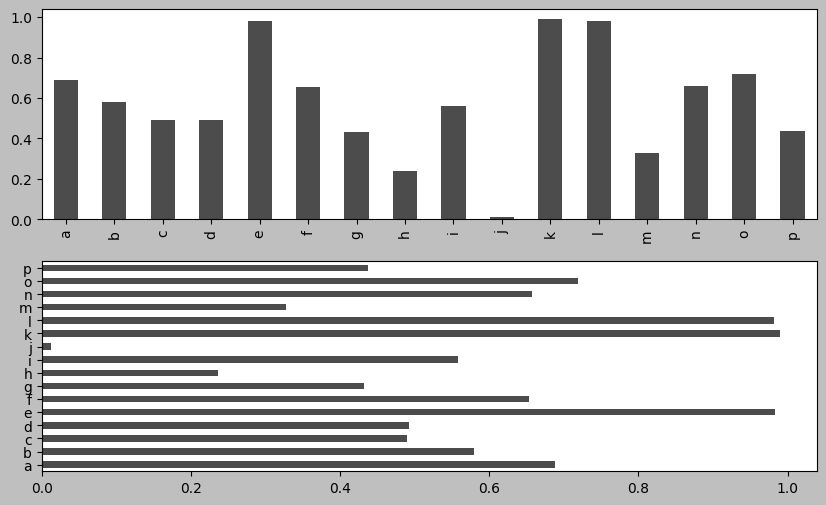

In [32]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

In [33]:
np.random.seed(12348)

<Axes: >

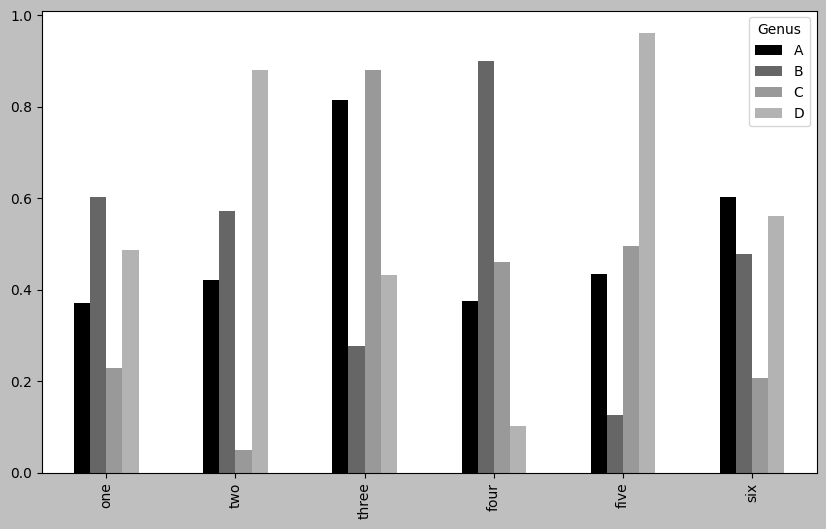

In [34]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df
df.plot.bar()

In [35]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

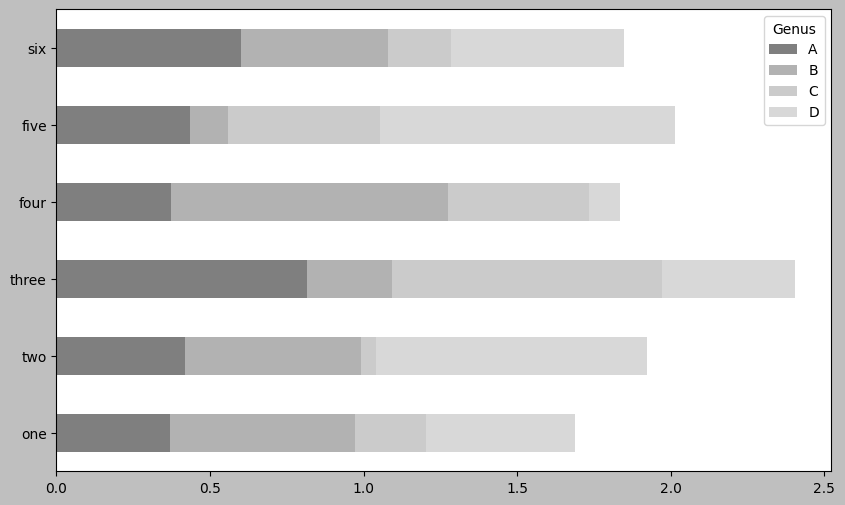

In [36]:
df.plot.barh(stacked=True, alpha=0.5)

In [37]:
plt.close("all")

In [39]:
import seaborn as sns
import pandas as pd

# Load dataset tips từ seaborn
tips = sns.load_dataset("tips")

# Xem vài dòng đầu
print(tips.head())

# Đếm số lượng bữa ăn theo day và size
party_counts = pd.crosstab(tips["day"], tips["size"])

# Sắp xếp lại thứ tự ngày
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])

print("\nParty counts:")
print(party_counts)


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Party counts:
size  1   2   3   4  5  6
day                      
Thur  1  48   4   5  1  3
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1


In [40]:
party_counts = party_counts.loc[:, 2:5]

<Axes: xlabel='day'>

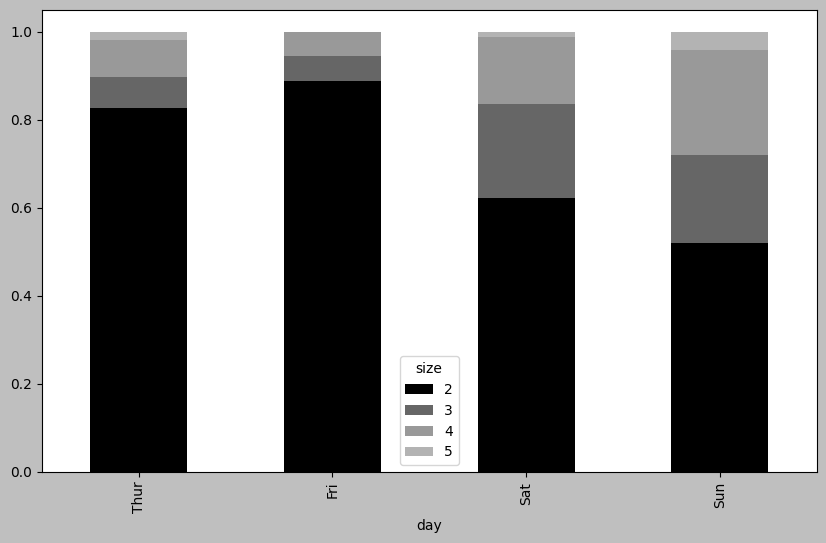

In [41]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="index")
party_pcts
party_pcts.plot.bar(stacked=True)

In [42]:
plt.close("all")

<Axes: xlabel='tip_pct', ylabel='day'>

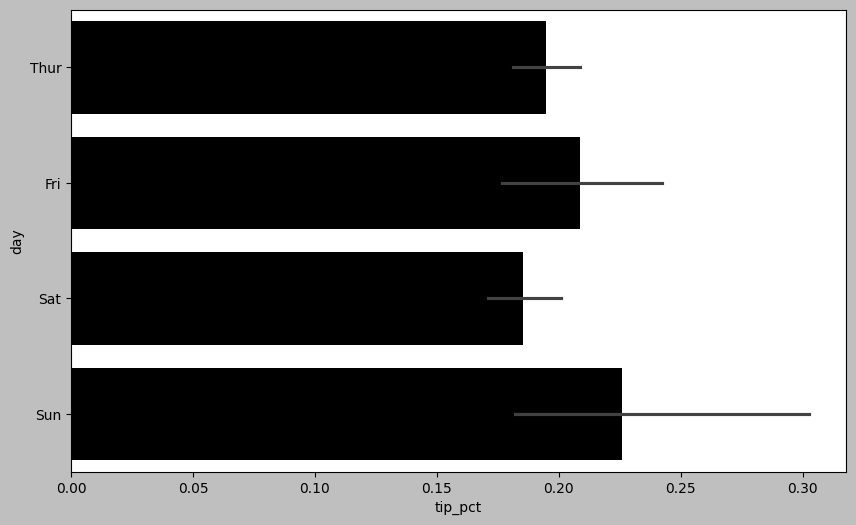

In [43]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

In [44]:
plt.close("all")

<Axes: xlabel='tip_pct', ylabel='day'>

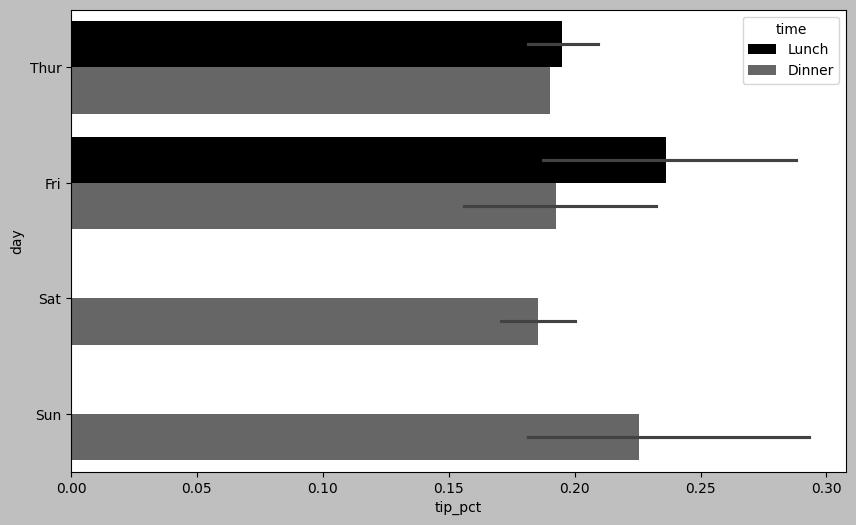

In [45]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

In [46]:
plt.close("all")

In [47]:
sns.set_style("whitegrid")

In [48]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

## Histograms and Density Plots

<Axes: ylabel='Frequency'>

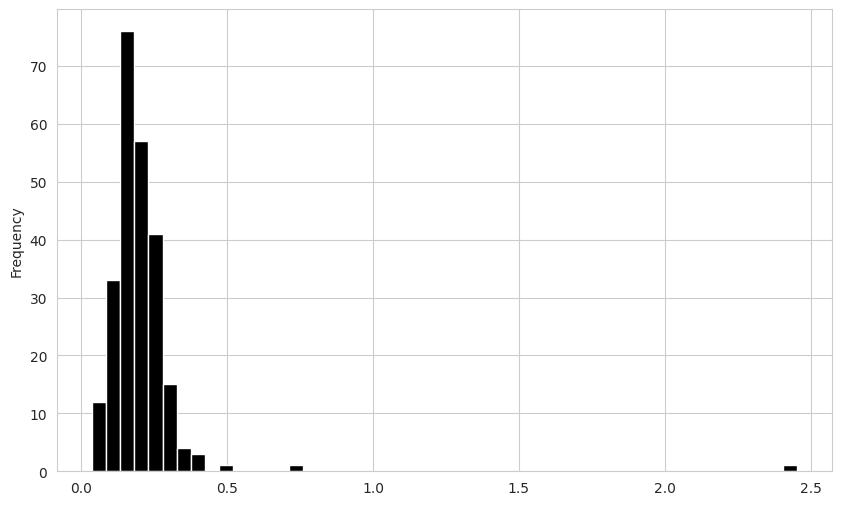

In [49]:
tips["tip_pct"].plot.hist(bins=50)

In [50]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='Density'>

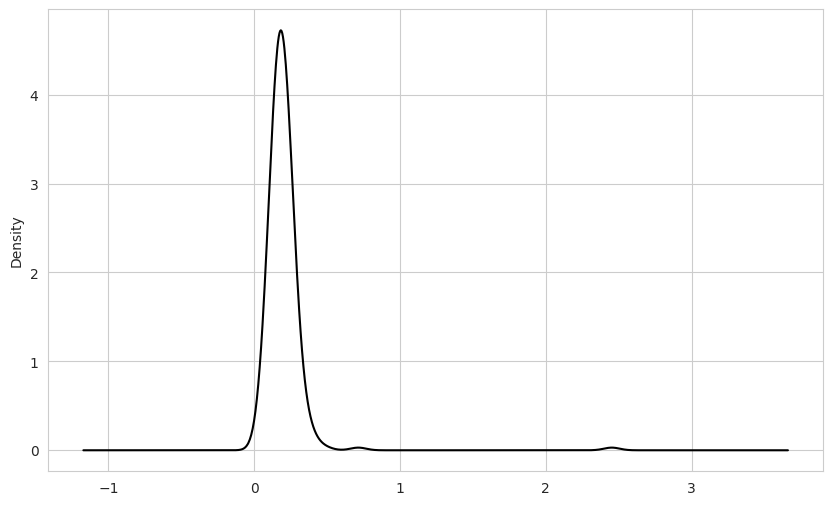

In [51]:
tips["tip_pct"].plot.density()

In [52]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='Count'>

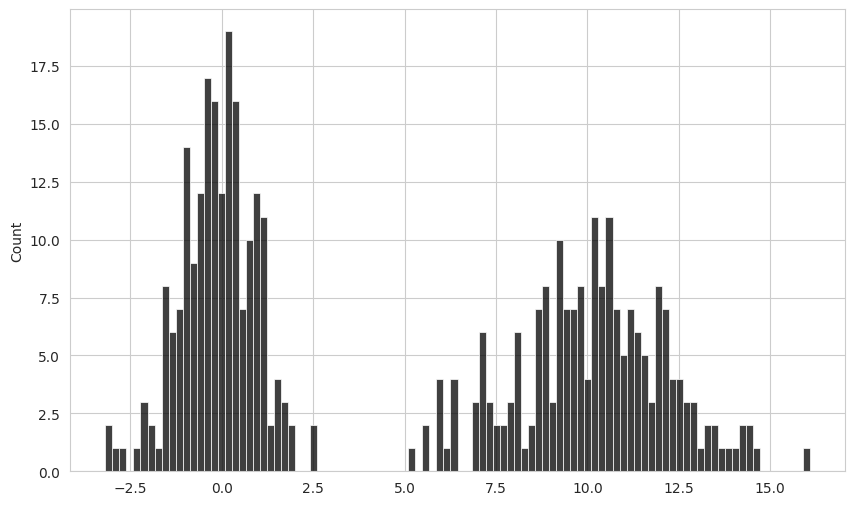

In [53]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins=100, color="black")

## Scatter or Point Plots

In [55]:
import statsmodels.api as sm
import numpy as np

# Load dữ liệu macro
macro = sm.datasets.macrodata.load_pandas().data

# Lấy các cột cần thiết
data = macro[["cpi", "m1", "tbilrate", "unemp"]]

# Biến đổi log và sai phân, bỏ giá trị NA
trans_data = np.log(data).diff().dropna()

print(trans_data.tail())


          cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560


In [56]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

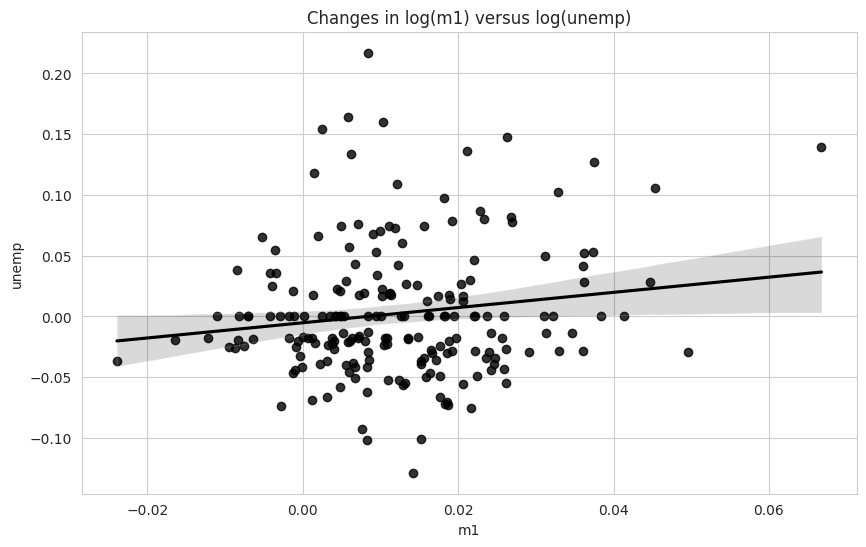

In [57]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

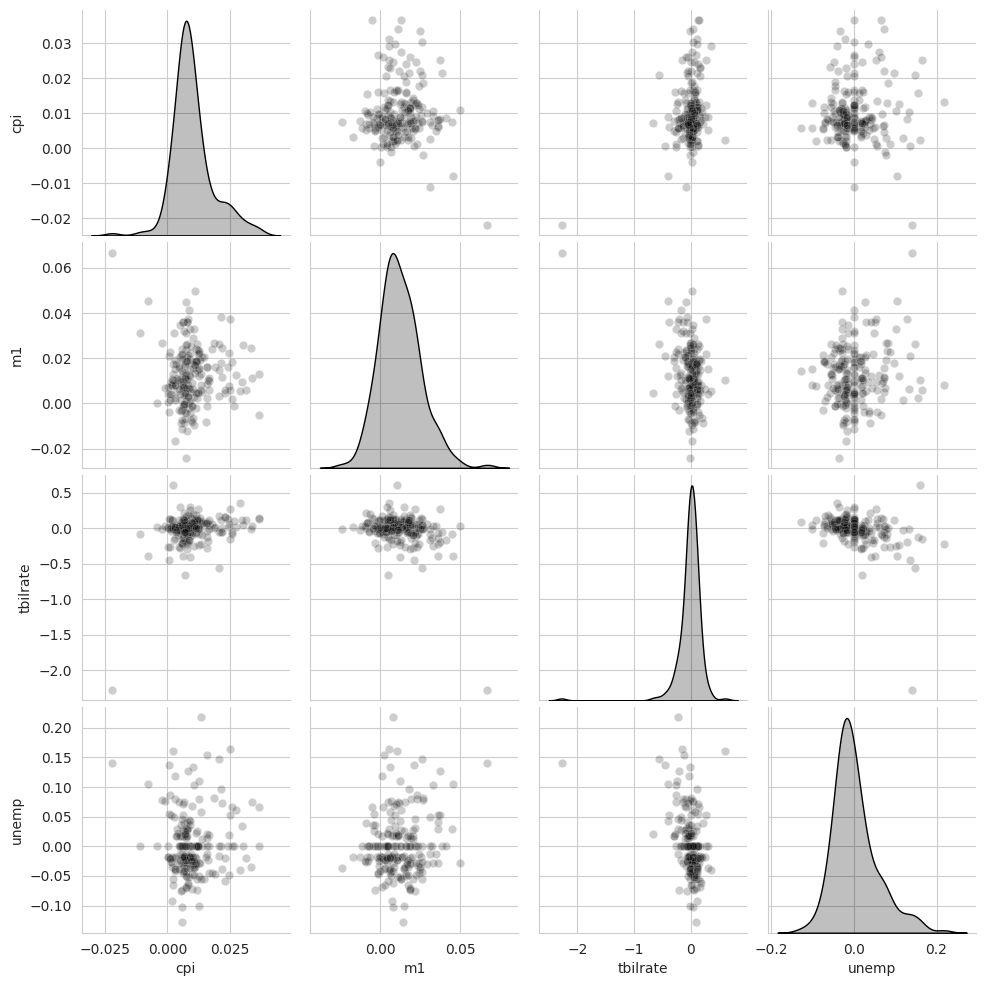

In [58]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

## Facet Grids and Categorical Data

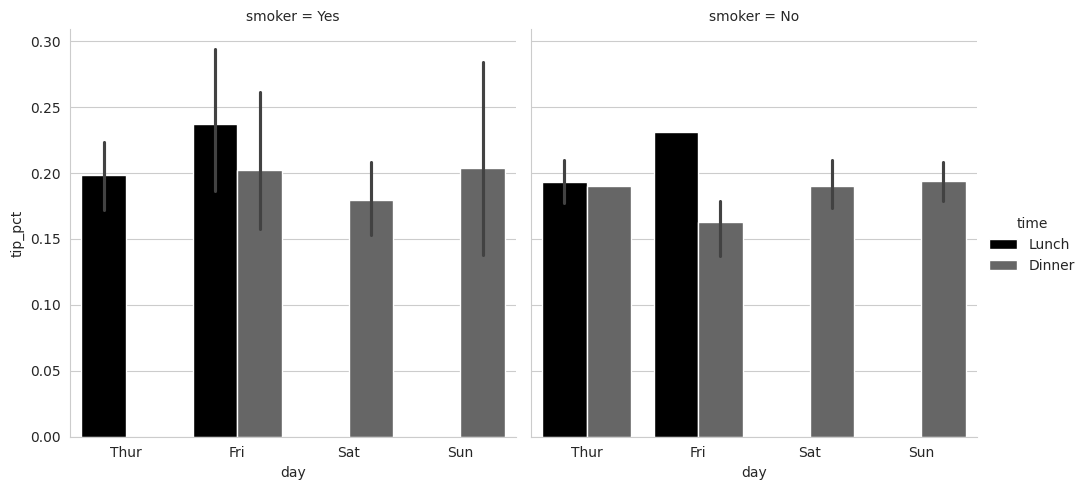

In [59]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

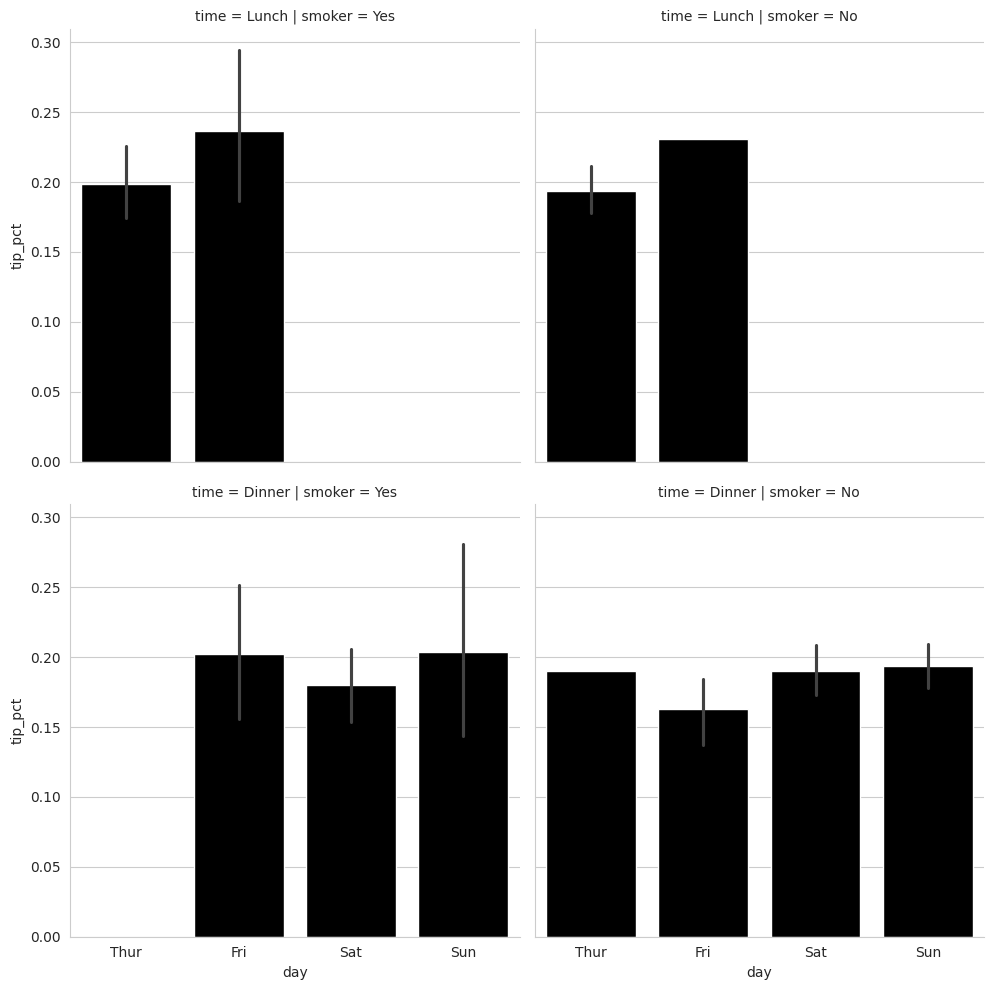

In [60]:
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

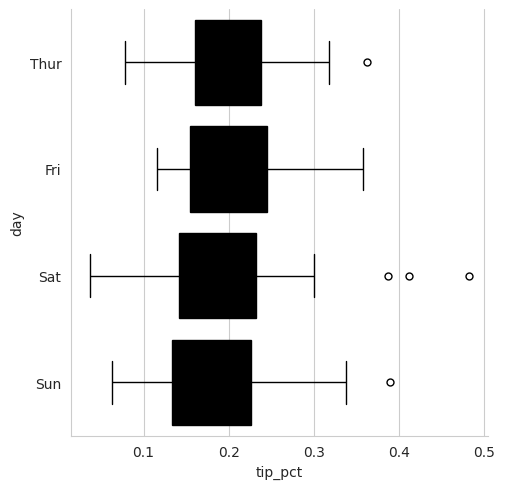

In [61]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5])

In [62]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS